Also see:
* [Statistical Mechanics: Entropy, Order Parameters, and Complexity](http://pages.physics.cornell.edu/~sethna/StatMech/EntropyOrderParametersComplexity.pdf) by James Sethna, Oxford University Press
* [Compuer Exercises for Statistical Mechanics book](http://pages.physics.cornell.edu/~sethna/StatMech/ComputerExercises.html)
* [Jupyter Notebook - Generating Random Walks](https://nbviewer.jupyter.org/url/pages.physics.cornell.edu/~sethna/StatMech/HintsAndMaterials/GeneratingRandomWalksHintsPython.ipynb)

# Random Walks and the Diffusion Equation

This notebook covers topics on the diffusion equation:
* Random walks and connectivity
* Random coin flips
* Drunkard's walk
* Random diffusion walks (random step size, random direction)

In [1]:
#%load_ext base16_mplrc
#%base16_mplrc dark monokai

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [3]:
from seaborn import xkcd_palette as xkcd

In [4]:
blue, green, red = xkcd(['denim blue','dusty green','brick red'])
purple, orange, cyan = xkcd(['dusty purple','burnt orange','cornflower'])

## Random Walks

Start by defining a random walk object, $d$-dimensional, with $N$ random samples.

These random samples are uniformly distributed over $[-\frac{1}{2}, \frac{1}{2}]$.

In [5]:
def RandomWalk(N, d):
    """
    Use random.uniform(min, max, shape) to generate an array of steps of shape (N,d), 
    and then use cumsum(..., axis=0) (which adds them up along the 'N' axis).
    """
    steps = np.random.uniform(-0.5,0.5,(N,d))
    walks = np.cumsum(steps, axis=0)
    return walks

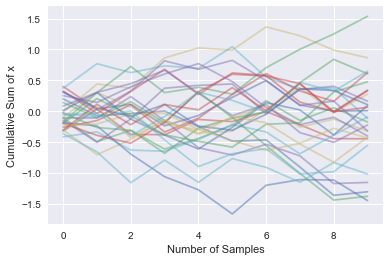

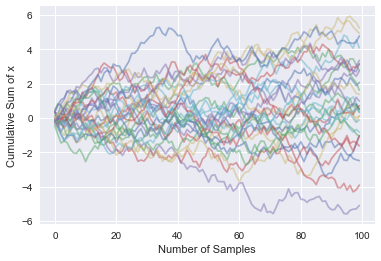

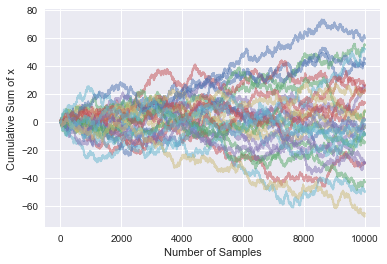

In [6]:
plt.figure()
t = 30
a = 0.5
for i in range(t): 
    plt.plot(RandomWalk(10,1), alpha=a);
    plt.xlabel("Number of Samples")
    plt.ylabel("Cumulative Sum of x")
plt.figure()
for i in range(t):
    plt.plot(RandomWalk(100,1), alpha=a);
    plt.xlabel("Number of Samples")
    plt.ylabel("Cumulative Sum of x")
plt.figure()
for i in range(t):
    plt.plot(RandomWalk(10000,1), alpha=a);
    plt.xlabel("Number of Samples")
    plt.ylabel("Cumulative Sum of x")

### 2D Random Walks

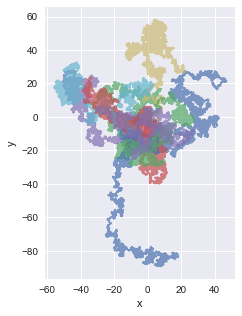

In [7]:
plt.figure(figsize=(6,5))
plt.axes(aspect='equal')

t = 10
a = 0.7

for i in range(t):
    x, y = RandomWalk(10000,2).transpose()
    plt.plot(x, y, alpha=a);
    plt.xlabel('x')
    plt.ylabel('y')

### Random Walk Statistics

In [8]:
def Endpoints(W, N, d):
    """Returns the endpoints of W random walks 
    of N steps each in d dimensions. 
    (No need to use cumsum; just sum. 
    If you generate a 3D array of size (W, N, d), 
    sum over axis=1 to sum over the N steps of each walk.
    """
    endpoints = []
    for w in range(W):
        endpoints.append(np.sum(RandomWalk(N,d), axis=0))
    return np.array(endpoints)

In [9]:
Endpoints(10,1000,1)

array([[  1128.99134465],
       [  1070.17557473],
       [  1204.56412861],
       [  2018.02691562],
       [-12635.36831218],
       [  -121.13437381],
       [  1950.41069647],
       [ -7257.161961  ],
       [ -5321.42722651],
       [  5637.09536988]])

Plot the endpoints of 10000 random walks of length 10. These show the similarity in the distribution *and* the magnitude of the distance traveled as a function of number of steps.

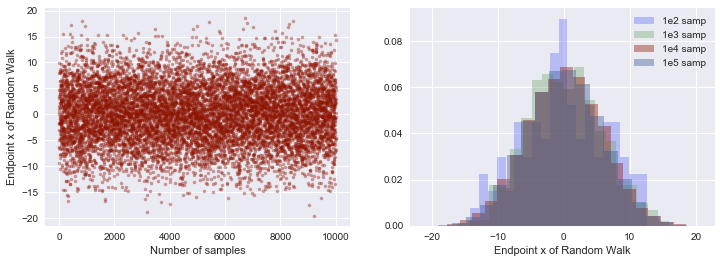

In [10]:
e2 = Endpoints(100,10,1)
e3 = Endpoints(1000,10,1)
e4 = Endpoints(10000,10,1)
e5 = Endpoints(100000,10,1)

a = 0.4

fig, ax = plt.subplots(1,2, figsize=(12,4))
#ax[0].plot(e2, '.', alpha=a, color=blue)
#ax[0].plot(e3, '.', alpha=a, color=green)
ax[0].plot(e4, '.', alpha=a, color=red)

ax[0].set_xlabel("Number of samples")
ax[0].set_ylabel("Endpoint x of Random Walk")

ax[1].hist(e2, bins=20, normed=True, alpha=a, label='1e2 samp', color=cyan)
ax[1].hist(e3, bins=20, normed=True, alpha=a, label='1e3 samp', color=green)
ax[1].hist(e4, bins=20, normed=True, alpha=a, label='1e4 samp', color=red)
ax[1].hist(e5, bins=20, normed=True, alpha=a, label='1e5 samp', color=blue)

ax[1].set_xlabel("Endpoint x of Random Walk")
ax[1].legend()

plt.show()

According to the Central Limit Theorem, an ensemble of $N$-step random walks with an RMS step size of $a$ has a Gaussian normal distribution as $N \rightarrow \infty$:

$$
\rho(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \dfrac{x^2}{2 \sigma^2} \right)
$$

where $\sigma = \sqrt{N} a$.

In general, the RMS of a function defined over an interval $t_0 \leq t \leq t_1$ is givne by:

$$
f_{RMS} = \sqrt{ \frac{1}{t_1 - t_0} \int_{t_0}^{t_1} f(t)^2 dt }
$$

For a 1D random walk with steps uniformly distributed in the interval $[-\frac{1}{2}, \frac{1}{2}]$, the distribution function $f(t)$ is uniform, so the integral becomes $(t_1 - t_0)$ and the RMS step size is:

$$
f_{RMS} = \sqrt{ \dfrac{t_1 - t_0}{t_1 - t_0} } = 1
$$

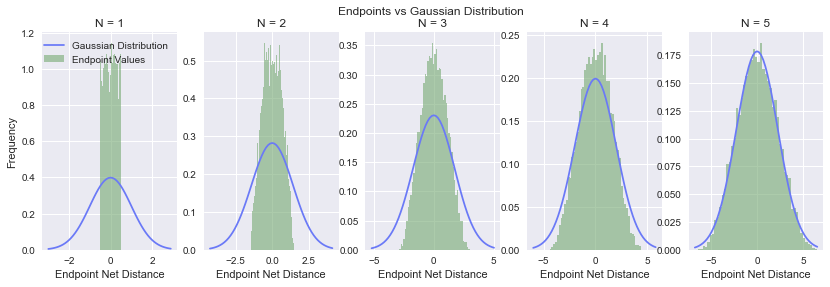

In [11]:
rms = 1
N = [1,2,3,4,5]
fig, axes = plt.subplots(1, len(N), figsize=(14,4))


for ax, n in zip(axes,N):
    
    ax.hist(Endpoints(10000,n,1), bins = 50, normed=True, 
            alpha=0.6, color=green, label='Endpoint Values');

    sigma = np.sqrt(n)*rms
    x = np.arange(-3.*sigma, 3.*sigma, 0.1*sigma)
    gauss = (1.0/np.sqrt(2*np.pi)/sigma) * \
            np.exp(-(x**2)/(2*sigma**2))
        
    ax.plot(x, gauss, 
            color=cyan, label='Gaussian Distribution');
    
    ax.set_title("N = %d"%(n))    
    ax.set_xlabel("Endpoint Net Distance")
    
axes[2].set_title("Endpoints vs Gaussian Distribution \nN = %d"%(N[len(N)//2]))

axes[0].set_ylabel("Frequency")
axes[0].legend(loc='best')
plt.show()

The Gaussian becomes a good approximation for the endpoint net distance traveled for a 1D random walk *very* quickly. The green area shows the distribtion of endpoint net distances for random walks containing $N = \{1,2,3,4,5\}$ steps, sampling 10,000 different random walks. 

As few as 5 random steps are required for the distribution to match the Gaussian to within more than $\pm 2 \sigma$. Compare the value below to the tails of the Gaussian fit:

In [12]:
print(2*sigma)

4.472135955


## Discrete Random Walks (Coin Flips)

Now apply the same logic to coin flips: generate random coin flips with $d$ coins. In this case, a random walk results from heads minus tails.

In [13]:
def RandomTrials(N, d):
    """
    Use random.uniform(0, 1, shape) to generate an array of steps of shape (N,d).
    Create a mask that turns those into 0 or 1.
    """
    # Flip d coins N times
    steps = np.random.uniform(0,1,(N,d))
    
    # Round so outcomes are 0 or 1
    steps = np.round(steps)
    
    # Shift to -1 or 1
    steps -= 0.5
    steps *= 2
    
    return steps

In [14]:
trials = RandomTrials(10000,10)

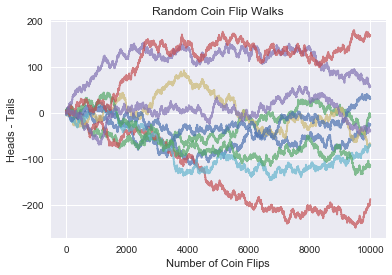

In [15]:
plt.figure()
plt.plot(trials.cumsum(axis=0), alpha=0.7)

plt.title("Random Coin Flip Walks")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Heads - Tails")

plt.show()

Suppose we denote by $s_{N}$ the difference between number of heads and number of tails found in $N$ coin flips.

To find a mean "distance" traveled by the random walk, we could use the mean of $s_N$, but this would be pretty boring - the expected value is 0 (same number of outcomes of -1 and 1).

Instead, we can measure the root mean square (RMS) of the sum, $\sqrt{ \langle s_N^2 \rangle }$.

After one, two, and three coin flips, the mean square is:

$$
\langle s_1^2 \rangle = \frac{1}{2}(-1)^2 + \frac{1}{2}(1)^2 \\
\langle s_2^2 \rangle = \frac{1}{4}(-2)^2 + \frac{1}{2}(0)^2 + \frac{1}{4}(2)^2 \\
\langle s_3^2 \rangle = \frac{1}{8}(-3)^2 + \frac{3}{8}(-1)^2 + \frac{3}{8}(1)^2 + \frac{1}{8}(3)^2
$$

Proof by induction that $\langle s_N^2 \rangle = N$:

Write RMS after N steps in terms of RMS after N-1 steps, plus the outcome of the last term:

$$
\langle s_N^2 \rangle = \langle (s_{N-1} + l_{N})^2 \rangle = \langle s_{N-1}^2  \rangle + 2 \langle s_{N-1} l_N \rangle + \langle l_N^2 \rangle
$$

Now, $l_N$ is $\pm 1$ with equal probability, and independent of $s_{N-1}$ (each coin flip is independent). This means:

$$
\langle s_{N-1} l_N \rangle = \frac{1}{2} s_{N-1}(1) + \frac{1}{2} s_{N-1} (-1) = 0
$$

We also know $l_N^2 = 1$, so

$$
\langle s_N^2 \rangle = \langle s_{N-1}^2 \rangle + \langle l_N^2 \rangle = \langle s_{N-1}^2 + 1 \rangle
$$

Now we assume that $\langle s_{N-1}^2 \rangle = N-1$, and we have proved that $\langle s_N^2 \rangle = N$.

In [16]:
def pascals_triangle(n):
    """Return the nth row of Pascal's Triangle.
    """
    if(n<0):
        raise Exception("Error: n>=0")
    elif(n==0):
        return [1]
    elif(n==1):
        return [1,1]
    
    else:
        row_nm1 = pascals_triangle(n-1)
        
        row_n = [1]
        
        for j in range(0,len(row_nm1)-1):
            row_n.append( row_nm1[j] + row_nm1[j+1] )
            
        row_n.append(1)
        
        return row_n

In [17]:
pasc = [pascals_triangle(1),
        pascals_triangle(2),
        pascals_triangle(3),
        pascals_triangle(4),
        pascals_triangle(5),
        pascals_triangle(6)]

pprint(pasc)

[[1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1]]


In [18]:
N = 6

ix = N-1


apasc = np.array( pasc[ix] )
coeffs = np.array( pasc[ix]/np.sum(pasc[ix]) )

print("Pascal's Triangle Row:")
pprint(apasc)
print("------")
print("Coefficients for RMS:")
pprint(coeffs)
print("-------")
print("RMS:")

lo = -(len(apasc)-1)
hi = (len(apasc)-1)

sterms = np.array( range(lo, hi+2, 2) )

print(np.dot(coeffs,sterms**2))

Pascal's Triangle Row:
array([ 1,  6, 15, 20, 15,  6,  1])
------
Coefficients for RMS:
array([ 0.015625,  0.09375 ,  0.234375,  0.3125  ,  0.234375,  0.09375 ,
        0.015625])
-------
RMS:
6.0


In [19]:
def rms(n):
    """Compute the RMS after n coin flips
    """
    pn = pascals_triangle(n)
    apasc = np.array(pn)
    coeffs = np.array(pn/np.sum(pn))
    
    # This defines what we're taking the RMS of:
    # (heads - tails) leads to -X:2:X range pattern
    lo = -(len(pn)-1)
    hi = (len(pn)-1)

    sterms = np.array( range(lo, hi+2, 2) )

    mse = np.dot(coeffs,sterms**2)
    return np.sqrt(mse)

In [20]:
rms(3)

1.7320508075688772

In [21]:
rms(4)

2.0

In [22]:
for i in range(10):
    print("RMS (%d steps) = sqrt(%d) = %0.1f"%( i+1, i+1, rms(i+1) ))

RMS (1 steps) = sqrt(1) = 1.0
RMS (2 steps) = sqrt(2) = 1.4
RMS (3 steps) = sqrt(3) = 1.7
RMS (4 steps) = sqrt(4) = 2.0
RMS (5 steps) = sqrt(5) = 2.2
RMS (6 steps) = sqrt(6) = 2.4
RMS (7 steps) = sqrt(7) = 2.6
RMS (8 steps) = sqrt(8) = 2.8
RMS (9 steps) = sqrt(9) = 3.0
RMS (10 steps) = sqrt(10) = 3.2


## Random Walks with Fixed Step Size (Drunkard's Walk)

The rules of the random walk can be modified to allow steps of some length $L$ at regular intervals in any direction on the 2D plane. The steps may be taken in random directions $\theta$, with each step's direction uncorrelated to the prior step's direction. The lack of correlation means the dot product between any two steps has an expected value of 0:

$$
\langle l_m \cdot l_n \rangle = L^2 \langle \cos \theta \rangle = 0
$$

This can lead to another inductive proof that $\langle s_N^2 \rangle = NL^2$, which makes the root mean square (RMS) quantity $RMS = \sqrt{N} L$.

In [23]:
def DrunkardsWalk(L, N, d):
    """Returns a random walk with step length L and N steps in 2D space.
    """
    # Get random angles for the drunkard's direction
    theta = np.random.uniform(0, 2*np.pi, (N-1,d))
    r = np.array([L*np.cos(theta), L*np.sin(theta)])
    
    # Make sure the first loation is 0,0
    r2 = np.zeros((2, N, d))
    r2[:,1:N,:] = r[:,0:(N-1),:]
    
    return r2

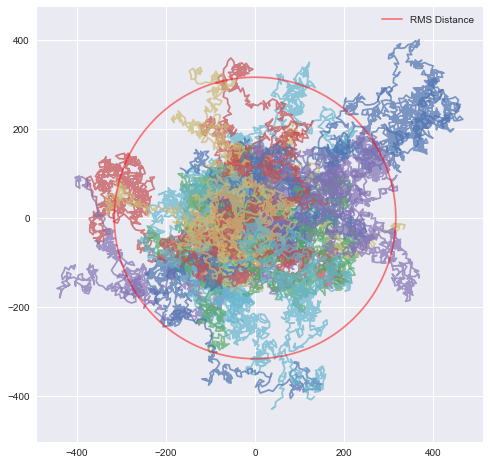

In [24]:
N = 1000
L = 10
Nwalks = 30

d = DrunkardsWalk(L, N, Nwalks)
c = np.cumsum(d, axis=1)

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.set_aspect('equal', 'datalim')

ax.plot(c[0],c[1], alpha=0.7)

theta = np.linspace(-np.pi,np.pi,1000)
x = np.sqrt(N)*L*np.cos(theta)
y = np.sqrt(N)*L*np.sin(theta)
ax.plot(x, y, 'r-', alpha=0.5, label='RMS Distance')

ax.legend()
plt.show()

## Deriving the Diffusion Equation

The random walk behavior exhibited above exhibits the same behavior as diffusion when we take the ensemble of a large number of random walks. In fact, the diffusion equation can be derived from taking the continuum limit for a large number of random walks.

### Derivation of 1D Diffusion Equation

Suppose we have a random walk with uncorrelated step directions, where each time step of size $\Delta t$ changes the particle's location $x$ by a step $l$:

$$
x(t+\Delta t) = x(t) + l(t)
$$

Now denote the probability distribution of each step size as $\chi(l)$. Assume $\chi(l)$ has mean 0 and standard deviation $a$. 

(For examples of $\chi(l)$, the prior random walk examples in this notebook were *discrete*, which means $\chi(l)$ would consist of delta functions - the function is 0 everywhere except where a step is valid, where it is infinite.)

The probability distribution of the particle being at location $x$ at the next timestep $t + \Delta t$ can be written $\rho(x, t+\Delta t)$ and can be expressed in terms of the probability distribution of the particle's prior positon, $\rho(x^{\prime}, t)$.

For a particle to go from $x^{\prime}$ to $x$, the step size must be $l(t) = x - x^{\prime}$. This happens with probability $\chi(x - x^{\prime})$. This should be multiplied by the probability density of the particle being at $x^{\prime}$ to begin with, which is denoted $\rho(x^{\prime},t)$.

Integrating over the original positions $x^{\prime}$, we get:

$$
\rho(x, t + \Delta t) = \int_{-\infty}^{\infty} \rho(x^{\prime},t) \chi(x - x^{\prime}) d x^{\prime}
$$

When the variable of intgration is changed to $z = x - x^{\prime}$, this becomes a convolution:

$$
\rho(x, t + \Delta t) = \int_{-\infty}^{\infty} \rho(x - z, t) \chi(z) dz
$$

Now further suppose that $\rho$ is spread out over a large space relative to the scale at which $\rho$ varies. Then a Taylor expansion of $\rho(x-z)$ will put it in terms of $\rho(x)$:

$$
\rho(x-z) \approx \rho(x,t) - z \dfrac{\partial \rho}{\partial x} + \dfrac{z^2}{2} \dfrac{\partial^2 \rho}{\partial x^2}
$$

and the integral above becomes:

$$
\rho(x, t + \Delta t) \approx \rho(x,t) \int \chi(z) dz - \dfrac{\partial \rho}{\partial x} \int z \chi(z) dz + \dfrac{1}{2} \dfrac{\partial^2 \rho}{\partial x^2} \int z^2 \chi(z) dz
$$

and the first integral (the zeroth moment) becomes 1, while the second integral (the mean) becomes 0.

This leads to:

$$
\rho(x, t+\Delta t) = \rho(x,t) + \dfrac{1}{2} \dfrac{\partial^2 \rho}{\partial x^2} a^2
$$

THe last assumption is that $\rho$ is spread out over time as well, so that only small changes in $\rho$ occur during the timestep duration $\Delta t$. This means we can approximate the time derivative as:

$$
\dfrac{\partial \rho}{\partial t} \Delta t = \rho(x, t+\Delta t) - \rho(x,t)
$$

we then obtain the diffusion equation,

$$
\dfrac{\partial \rho}{\partial t} = \dfrac{a^2}{2 \Delta t} \dfrac{\partial^2 \rho}{\partial x^2}
$$

and this leads to the diffusion equation when we substitute

$$
D = \dfrac{a^2}{2 \Delta t}
$$

The 1D diffusion equation is:

$$
\dfrac{\partial \rho}{\partial t} = D \dfrac{\partial^2 \rho}{\partial x^2}
$$

## Plotting Diffusion

We can extract a diffusion coefficient for our random walks from finding an ensemble of a large number of samples of the random walk. Let's look again at the Drunkard's Walk:

In [25]:
import matplotlib.pyplot as plt

In [26]:
N = 1000
L = 10
Nwalks = 30

d = DrunkardsWalk(L, N, Nwalks)
c = np.cumsum(d, axis=1)
print(c.shape)

(2, 1000, 30)


The vector $c$ gives us a two-dimensional random walk (2), N realizations (1e3), and 30 samples. If we crank up the number of samples, we can construct a 2D histogram:

In [27]:
N = 1000
L = 10
Nwalks = 10000

d = DrunkardsWalk(L, N, Nwalks)
c = np.cumsum(d, axis=1)
print(c.shape)

(2, 1000, 10000)


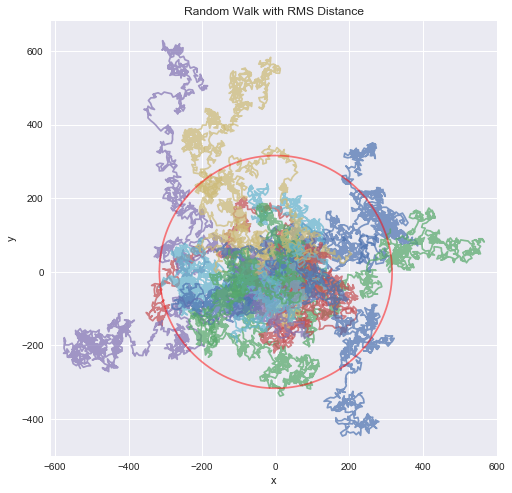

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.set_aspect('equal', 'datalim')

# Plot random walks
ax.plot(c[0,:,0:20],c[1,:,0:20], alpha=0.7)

# Plot RMS circle
theta = np.linspace(-np.pi,np.pi,1000)
x = np.sqrt(N)*L*np.cos(theta)
y = np.sqrt(N)*L*np.sin(theta)
ax.plot(x,y,'r-', alpha=0.5, label='Expected RMS Distance')

ax.set_title("Random Walk with RMS Distance")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

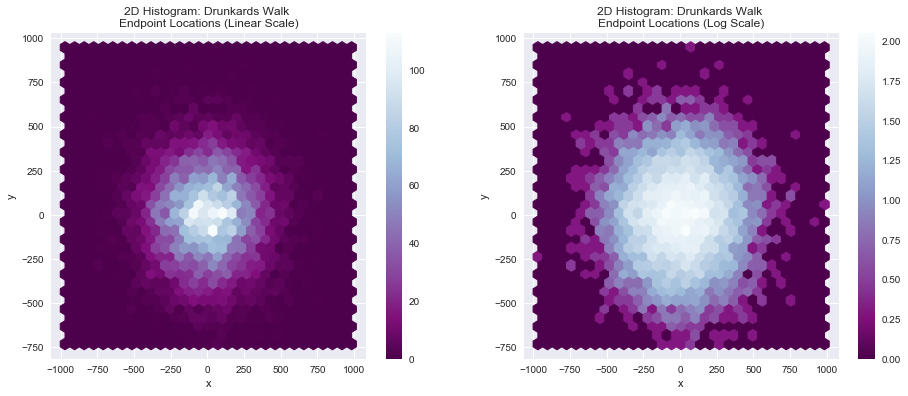

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0]
hb = ax.hexbin(c[0,1000-1,:], c[1,1000-1,:], gridsize=30, cmap='BuPu_r')
ax.set_title('2D Histogram: Drunkards Walk \nEndpoint Locations (Linear Scale)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(hb, ax=ax)



ax = axs[1]
loghb = ax.hexbin(c[0,1000-1,:], c[1,1000-1,:], gridsize=30, bins='log', cmap='BuPu_r')

ax.set_title('2D Histogram: Drunkards Walk \nEndpoint Locations (Log Scale)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(loghb, ax=ax)
plt.show()

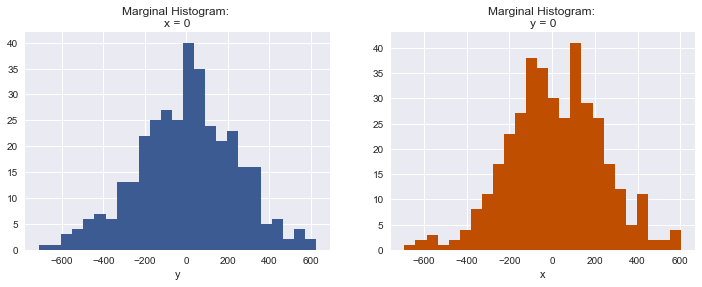

In [30]:
# Plot a 2D x/y slice (dotted line) on distribution on left axis

# Plot marginal PDF for final x = 0, and separately for final y = 0
x = c[0,1000-1,:]
y = c[1,1000-1,:]

fig, axs = plt.subplots(1, 2, figsize=(12,4))

nbins = 25

# marginal condition for vertical line (red):
# x is within +/-epsilon (near origin)
# plotting y values
axs[0].hist(y[(x<10)&(x>-10)],bins=nbins, color=blue)
axs[0].set_title("Marginal Histogram: \nx = 0")
axs[0].set_xlabel('y')

# marginal condition for horizontal line (blue):
# y is within +/-epsilon (near origin)
axs[1].hist(x[(y<10)&(y>-10)],bins=nbins, color=orange)
axs[1].set_title("Marginal Histogram: \ny = 0")
axs[1].set_xlabel('x')


plt.show()

In [31]:
def drunkards_random_walks_2d(N, L, Nwalks, xlim=1, ylim=1):
    
    d = DrunkardsWalk(L, N, Nwalks)
    c = np.cumsum(d, axis=1)

    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    

    # Left axis:
    ax = axs[0]
    
    hexx = c[0,N-1,:]
    hexy = c[1,N-1,:]
    
    hb = ax.hexbin(hexx, hexy, gridsize=30, cmap='pink')
    ax.set_title('Drunkards Walk 2D Histogram')
    plt.colorbar(hb, ax=ax)
    
    
    
    # (still) left axis:
    
    # Plot a 2D x/y slice (dotted line) on distribution on left axis
    ax.plot((0,0), (min(hexy), max(hexy)), '--', color=green, alpha=1)
    ax.plot((min(hexx), max(hexx)), (0,0), '--', color=blue, alpha=1)

    
    
    # Right axis:
    ax = axs[1]
    
    # Plot marginal PDF for final x = 0, and separately for final y = 0
    x = c[0,N-1,:]
    y = c[1,N-1,:]

    # marginal condition for vertical line (red):
    # x is within +/-epsilon (near origin)
    # plotting y values
    ax.hist(y[(x<=xlim)&(x>=-xlim)], bins=20, 
            alpha=0.6, normed=True, color=green,
            label='Marginal: y|x=0')

    # marginal condition for horizontal line (blue):
    # y is within +/-epsilon (near origin)
    ax.hist(x[(y<=ylim)&(y>=-ylim)], bins=20, 
            alpha=0.6, normed=True, color=blue,
            label='Marginal: x|y=0')
    
    # analytical 1d gaussian
    sigma = np.sqrt(N)*L
    x = np.arange(-3.*sigma, 3.*sigma, 0.1*sigma)
    gauss = (1.0/np.sqrt(2*np.pi)/sigma) * \
            np.exp(-(x**2)/(2*sigma**2))

    ax.plot(x, gauss, '--',
        color='purple', label='Gaussian Distribution'); 
    
    ax.set_title('Drunkards Walk: Marginal Histogram \nx=0, y=0')
    plt.legend()
    plt.show()
    

In [32]:
Nwalks = 50000
N = 1000
L = 1

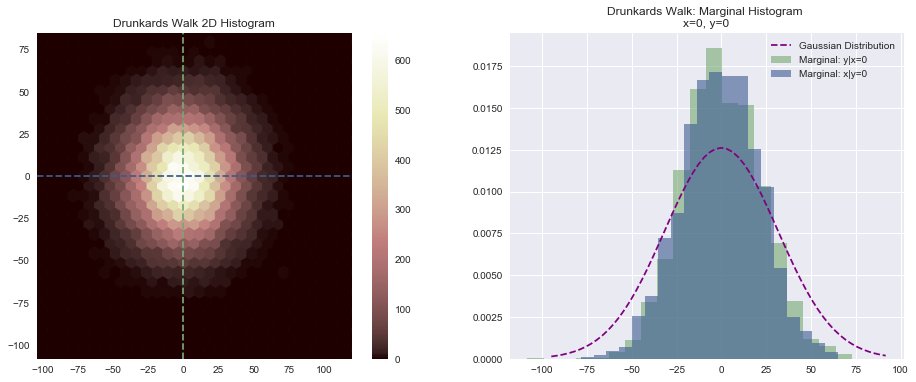

In [33]:
drunkards_random_walks_2d(N, L, Nwalks, xlim=1, ylim=1)

It is important to note that the normal distribution does not fit well, because we are using a discontinuous function as the step size distribution (delta functions for step size of $L$). 

If we redefine the random walk process to take a normal random step size, mean 0 and standard deviation 1:

In [34]:
def DiffusionWalk(N, d):
    """Returns a random walk with 
    random normal step length L
    and N steps in 2D space.
    """
    # Get random angles for the drunkard's direction
    theta = np.random.uniform(-np.pi, np.pi, (N,d))
    #r = np.array([np.random.randn()*np.cos(theta), 
    #              np.random.randn()*np.sin(theta)])
    r = np.random.randn(2,N,d)
    
    return r

In [35]:
def diffusion_2d(N, Nwalks, xlim=1, ylim=1):
    
    d = DiffusionWalk(N, Nwalks)
    c = np.cumsum(d, axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    
    # Left axis:
    ax = axs[0]
    
    hexx = c[0,N-1,:]
    hexy = c[1,N-1,:]
    
    hb = ax.hexbin(hexx, hexy, gridsize=30, cmap='pink')
    ax.set_title('Diffusion Process 2D Histogram')
    plt.colorbar(hb, ax=ax)
    
    
    
    
    # (still) left axis:
    
    # Plot a 2D x/y slice (dotted line) on distribution on left axis
    ax.plot((0,0), (min(hexy), max(hexy)), '--', color=green, alpha=1)
    ax.plot((min(hexx), max(hexx)), (0,0), '--', color=blue, alpha=1)
    
    
    # Right axis:
    ax = axs[1]
    
    # Plot marginal PDF for final x = 0, and separately for final y = 0
    x = c[0,N-1,:]
    y = c[1,N-1,:]
    
    
    # marginal condition for vertical line (red):
    # x is within +/-epsilon (near origin)
    # plotting y values
    #ax.hist(y, bins=20,
    ax.hist(y[(x<=xlim)&(x>=-xlim)], bins=20, 
            alpha=0.6, normed=True, color=green,
            label='Marginal: y|x=0')
    
    
    # marginal condition for horizontal line (blue):
    # y is within +/-epsilon (near origin)
    #ax.hist(x, bins=20,
    ax.hist(x[(y<=ylim)&(y>=-ylim)], bins=20, 
            alpha=0.6, normed=True, color=blue,
            label='Marginal: x|y=0')
    
    
    # analytical 1d gaussian
    sigma = np.sqrt(N)
    x = np.arange(-3.*sigma, 3.*sigma, 0.1*sigma)
    gauss = (1.0/np.sqrt(2*np.pi)/sigma) * \
            np.exp(-(x**2)/(2*sigma**2))
    
    ax.plot(x, gauss, '--',
        color='purple', label='Gaussian Distribution'); 
    
    ax.set_title('Diffusion: Marginal Histogram\nx=0, y=0')
    plt.legend()
    plt.show()
    

Diffusion histograms for Nsteps = 1:


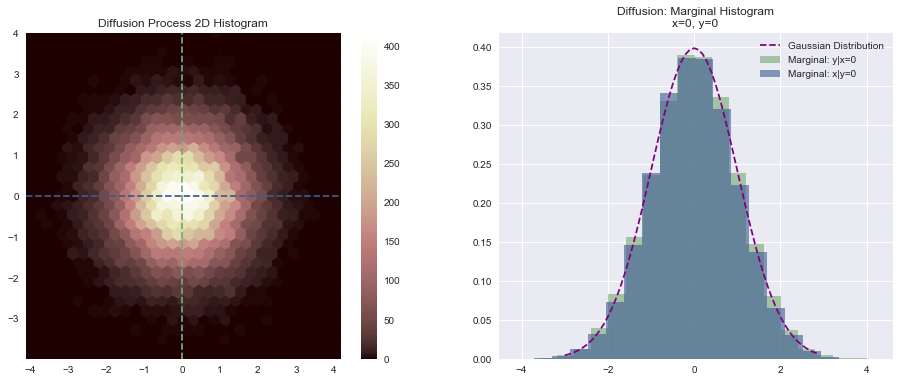

Diffusion histograms for Nsteps = 2:


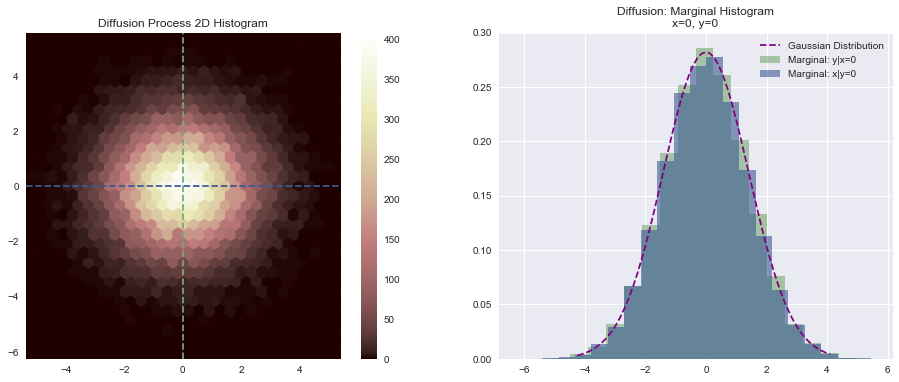

Diffusion histograms for Nsteps = 5:


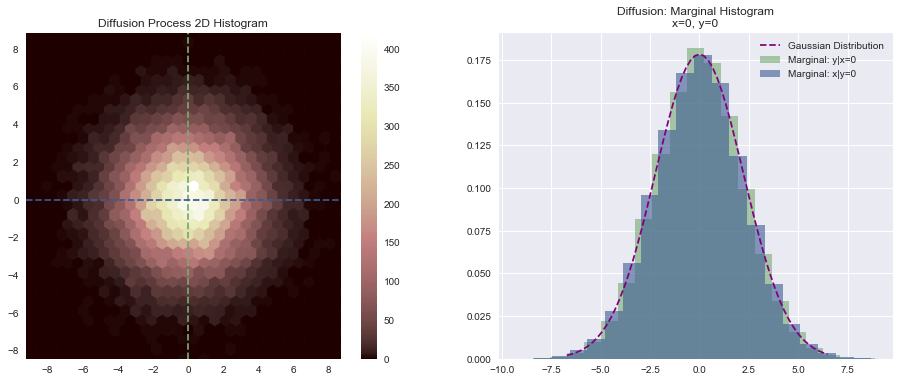

Diffusion histograms for Nsteps = 10:


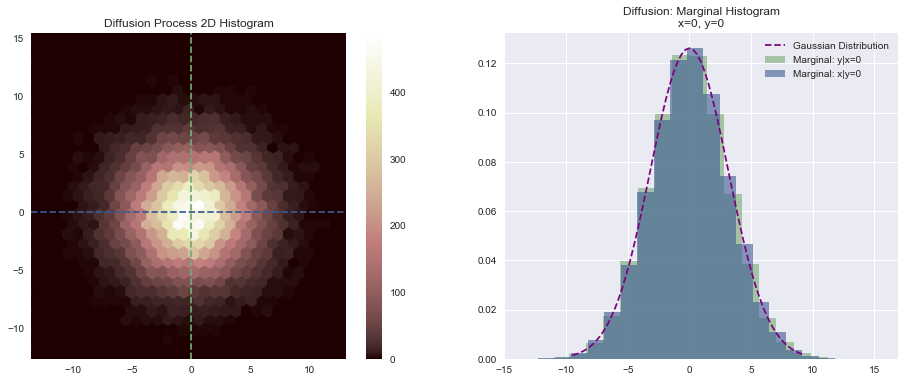

In [36]:
for i in [1,2,5,10]:
    print("="*40)
    print("Diffusion histograms for Nsteps = %d:"%(i))
    diffusion_2d(i,40000,5,5)

With random walks containing as few as 5 steps, the histograms of the resulting endpoints are already well-described by a Gaussian distribution. 

The step size $l$ for each step of the diffusion walk (replacing the constant $L$ used in the drunkards walk) is drawn from a Gaussian distribution $\chi(l)$ with mean 0 and standard deviation 1.

This simplifies the standard deviation of the Gaussian describing the endpoints to:

$$
s_{N} = \sqrt{N}
$$

where $s_N$ is the distance traveled by a diffusion walk with $N$ steps. The purple lines show a Gaussian with standard deviation $\sigma = \sqrt{N}$.

## Diffusion Length

Note that we can modify the diffusion length scale $a$ by sampling from a normal distribution with standard deviation $a$, as done below with the `np.random.normal` call.

In [37]:
def DiffusionWalk_a(a, N, d):
    """Returns a random walk with 
    random normal step length l,
    sampled from a normal distribution
    (mean 0 and standard deviation a),
    and N steps in 2D space.
    """
    # Get N-1 random steps
    r = np.random.normal(loc=0, scale=a, size=(2,N-1,d))
    
    # Make sure the first location is 0,0
    r2 = np.zeros((2, N, d))
    r2[:,1:N,:] = r[:,0:(N-1),:]
    
    return r2

In [38]:
DiffusionWalk_a(10, 5, 1)

array([[[  0.        ],
        [  8.18942988],
        [  1.29064907],
        [ -6.44190353],
        [ -5.49450648]],

       [[  0.        ],
        [  6.73822423],
        [ -4.6479596 ],
        [-11.75501715],
        [ -1.94176344]]])

In [39]:
def diffusion_2d_a(a, N, Nwalks, xlim=1, ylim=1):
    
    d = DiffusionWalk_a(a, N, Nwalks)
    c = np.cumsum(d, axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

    # Left axis:
    ax = axs[0]
    
    hexx = c[0,N-1,:]
    hexy = c[1,N-1,:]
    
    hb = ax.hexbin(hexx, hexy, gridsize=30, cmap='pink')
    ax.set_title("Diffusion Process 2D Histogram \na = %0.1f, N = %d"%(a, N))
    plt.colorbar(hb, ax=ax)
    
    
    
    # (still) left axis:
    
    # Plot a 2D x/y slice (dotted line) on distribution on left axis
    ax.plot((0,0), (min(hexy), max(hexy)), '--', color=green, alpha=1)
    ax.plot((min(hexx), max(hexx)), (0,0), '--', color=blue, alpha=1)
    
    
    
    # Right axis:
    ax = axs[1]
    
    # Plot marginal PDF for final x = 0, and separately for final y = 0
    x = c[0,N-1,:]
    y = c[1,N-1,:]
    
    
    # marginal condition for vertical line (red):
    # x is within +/-epsilon (near origin)
    # plotting y values
    #ax.hist(y, bins=20,
    ax.hist(y[(x<=xlim)&(x>=-xlim)], bins=20, 
            alpha=0.6, normed=True, color=green,
            label='Marginal: y|x=0')
    
    
    # marginal condition for horizontal line (blue):
    # y is within +/-epsilon (near origin)
    #ax.hist(x, bins=20,
    ax.hist(x[(y<=ylim)&(y>=-ylim)], bins=20, 
            alpha=0.6, normed=True, color=blue,
            label='Marginal: x|y=0')
    
    
    # analytical 1d gaussian
    sigma = np.sqrt(N)*a
    x = np.arange(-3.*sigma, 3.*sigma, 0.1*sigma)
    gauss = (1.0/np.sqrt(2*np.pi)/sigma) * \
            np.exp(-(x**2)/(2*sigma**2))
    
    ax.plot(x, gauss, '--',
        color='purple', label='Gaussian Distribution'); 
    
    ax.set_title("Diffusion: Marginal Histogram\nx=0, y=0, a = %0.1f, N = %d"%(a,N))
    plt.legend()
    plt.show()
    

diffusion histograms for Nsteps = 2


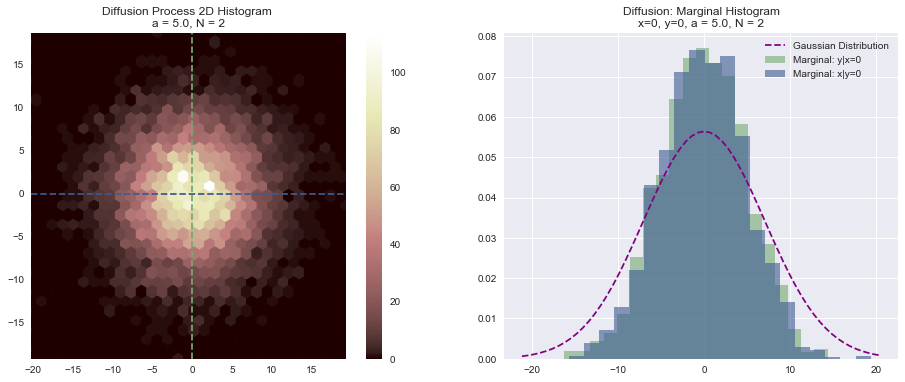

diffusion histograms for Nsteps = 5


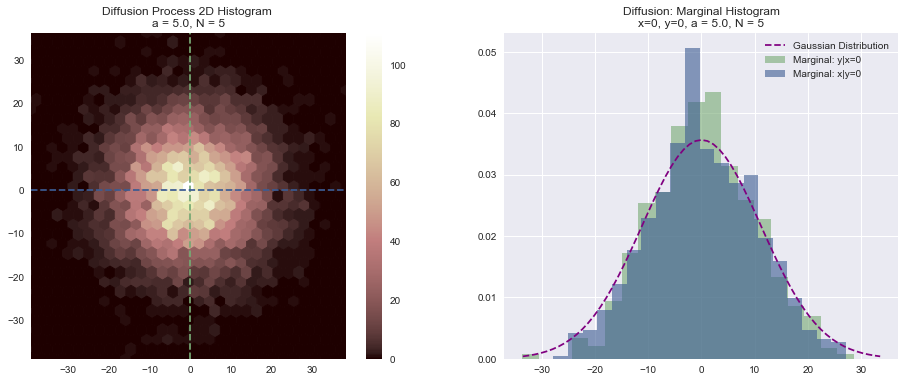

diffusion histograms for Nsteps = 10


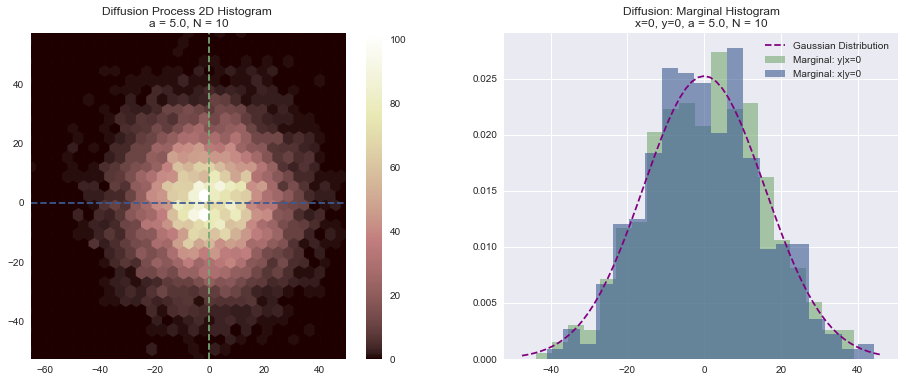

In [40]:
for i in [2,5,10]:
    print("diffusion histograms for Nsteps = %d"%(i))
    diffusion_2d_a(5, i, 10000, 1, 1)

A longer numer of steps results in longer possible diffusion lengths, but more opportunities to turn back toward the origin, resulting in a Gaussian distribution of endpoints after as few as 5 and as many as 1,000 random diffusion steps.

diffusion histograms for Nsteps = 50


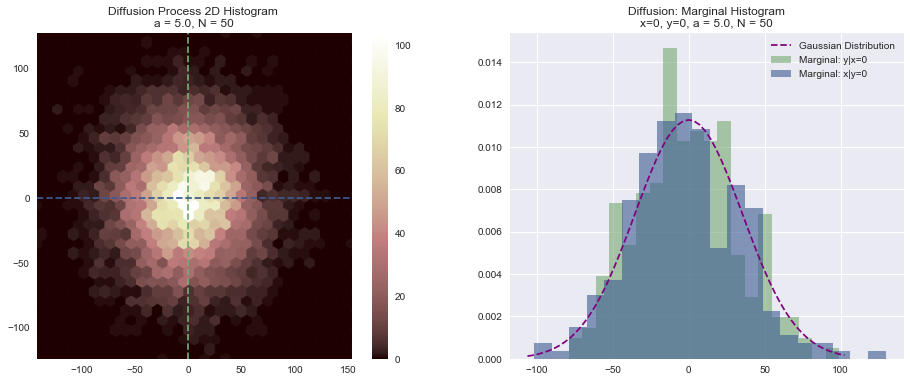

diffusion histograms for Nsteps = 100


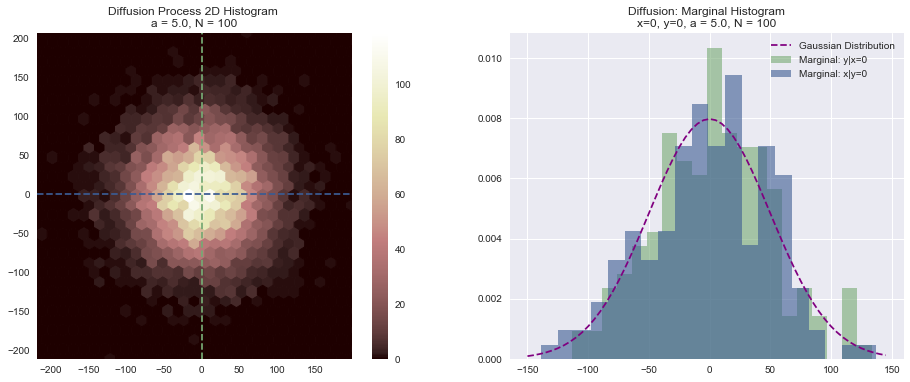

diffusion histograms for Nsteps = 1000


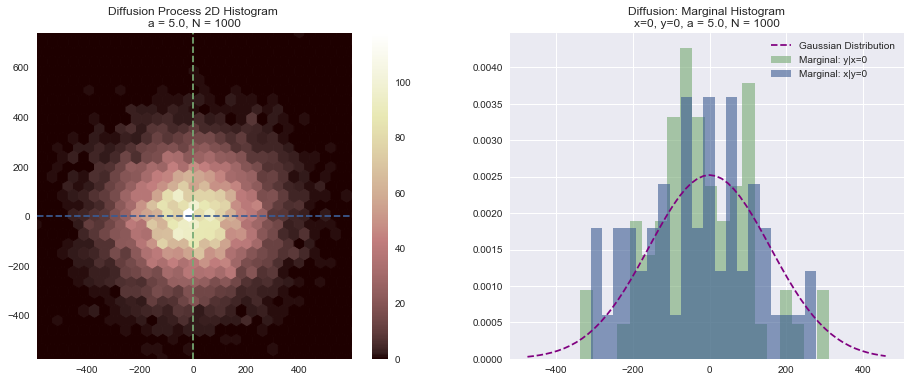

In [41]:
for i in [50,100,1000]:
    print("diffusion histograms for Nsteps = %d"%(i))
    diffusion_2d_a(5, i, 10000, 1, 1)

## Decreasing Accuracy for Given Sample Size

It's obvious there is a decreasing accuracy, for a given sample size, so that fewer samples have to cover more space. In the limit of 1,000 steps, 10,000 samples is simply not enough. 

This has now blossomed into a much deeper computational physics problem. Let's briefly examine more samples.

diffusion histograms for Nsteps = 1000


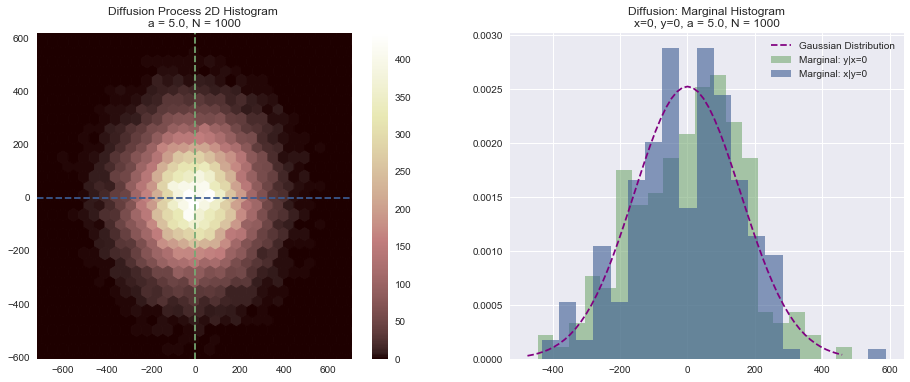

In [42]:
for i in [1000]:
    print("diffusion histograms for Nsteps = %d"%(i))
    diffusion_2d_a(5, i, 40000, 1, 1)

In [43]:
a = 5
N = 1000
Nwalks = 30

d = DiffusionWalk_a(a, N, Nwalks)
c = np.cumsum(d, axis=1)
print(c.shape)

(2, 1000, 30)


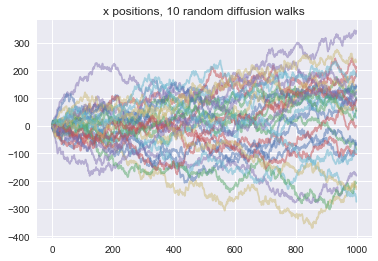

In [44]:
#plt.plot(c[0,:,1:10],c[1,:,1:10])
plt.title("x positions, 10 random diffusion walks")
plt.plot(c[0,:,:], alpha=0.5)
plt.show()

In [45]:
a = 5
N = 100
Nwalks = 100

d = DiffusionWalk_a(a, N, Nwalks)
c = np.cumsum(d, axis=1)

#print(c.shape)
#dxdys = []
#dx2dy2s = []

lag_master = []
msd_master = []

for i in range(c.shape[2]):
    
    pos = c[:,:,i]
    
    lagtimes = np.arange(1,N//2+1)
    msds = np.zeros((N//2,2))

    #print("-"*20)
    #print(">"+str(len(lagtimes)))
    #print(">"+str(N//2))
    
    #dxdy_runsum = 0
    #dx2dy2_runsum = 0
    
    for j, lt in enumerate(lagtimes):

        diff = pos[:,lt:] - pos[:,:-lt]
        msd = np.nanmean(diff**2, axis=1)
        msds[j] = msd
        
        #mean_dxdy = np.nanmean(diff,axis=1)
        #mean_dx2dy2 = np.nanmean(diff**2, axis=1)
        #dxdy_runsum += mean_dxdy
        #dx2dy2_runsum += mean_dx2dy2
    
    lag_master.append(lagtimes)
    msd_master.append(msds)
    
    #dxdy_runsum /= len(lagtimes)
    #dx2dy2_runsum /= len(lagtimes)
    
    #dxdys.append(dxdy_runsum)
    #dx2dy2s.append(dx2dy2_runsum)
    


In [46]:
if False:
    print(lag_master[0])
    print(msd_master[0])
    print("X:")
    print(msd_master[0][:,0])
    print("Y:")
    print(msd_master[0][:,1])
    print("\n")
    print(lag_master[0].shape)
    print(msd_master[0].shape)

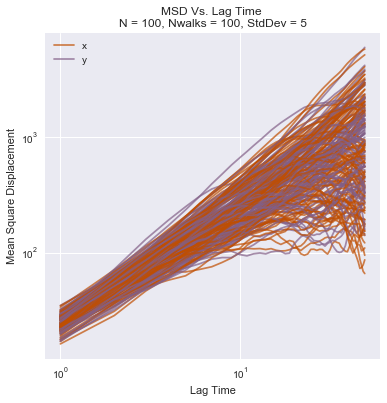

In [47]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

for i in range(Nwalks):
    
    # Set up labeling to happen once
    xplot_kwargs = {}
    yplot_kwargs = {}
    if(i==0):
        xplot_kwargs['label'] = 'x'
        yplot_kwargs['label'] = 'y'
        
    plt.loglog(lag_master[i], msd_master[i][:,0], color=orange, alpha=0.7, **xplot_kwargs)
    plt.loglog(lag_master[i], msd_master[i][:,1], color=purple, alpha=0.7, **yplot_kwargs)

plt.xlabel("Lag Time")
plt.ylabel("Mean Square Displacement")
plt.title("MSD Vs. Lag Time \nN = %d, Nwalks = %d, StdDev = %d"%(N,Nwalks,a))
plt.legend()
plt.show()

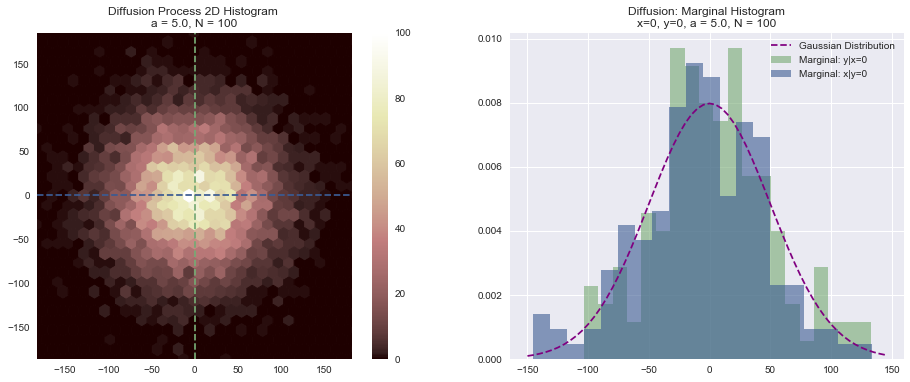

In [48]:
diffusion_2d_a(5, 100, 10000, 1, 1)

2D Histogram: Random Diffusion Walk Endpoints: 
N = 1000, Nwalks = 10000, sigma = 1


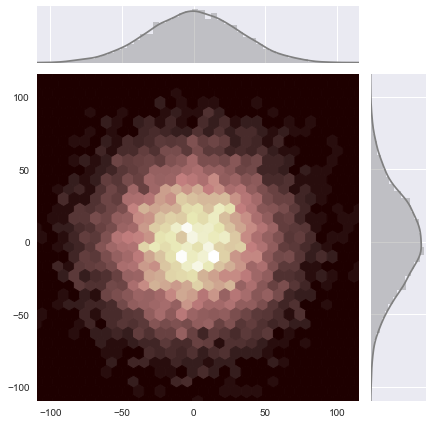

In [49]:
a = 1
N = 1000
Nwalks = 10000

d = DiffusionWalk_a(a, N, Nwalks)
c = np.cumsum(d, axis=1)

print("="*40)
print("2D Histogram: Random Diffusion Walk Endpoints: \n" \
    "N = %d, Nwalks = %d, sigma = %d"%(N, Nwalks, a))

hexx = np.array(c[0,N-1,:])
hexy = np.array(c[1,N-1,:])

xmin = np.max(np.array([np.min(hexx), np.min(hexy)]))
xmax = np.min(np.array([np.max(hexx), np.max(hexy)]))

#fig = plt.figure()
#sns.set_style("ticks")

g = sns.JointGrid(hexx, hexy)
g.plot_marginals(sns.distplot, color=".5")

g.plot_joint(plt.hexbin, gridsize=30, cmap='pink', extent=[xmin,xmax,xmin,xmax])

g.ax_joint.set_xlim([xmin,xmax])
g.ax_joint.set_ylim([xmin,xmax])

plt.show()

In [50]:
def msd_plots(a, N, Nwalks):
    
    d = DiffusionWalk_a(a, N, Nwalks)
    c = np.cumsum(d, axis=1)

    #print(c.shape)
    #dxdys = []
    #dx2dy2s = []

    lag_master = []
    msd_master = []

    for i in range(c.shape[2]):

        pos = c[:,:,i]

        lagtimes = np.arange(1,N//2+1)
        msds = np.zeros((N//2,2))

        #print("-"*20)
        #print(">"+str(len(lagtimes)))
        #print(">"+str(N//2))

        #dxdy_runsum = 0
        #dx2dy2_runsum = 0

        for j, lt in enumerate(lagtimes):

            diff = pos[:,lt:] - pos[:,:-lt]
            msd = np.nanmean(diff**2, axis=1)
            msds[j] = msd

            #mean_dxdy = np.nanmean(diff,axis=1)
            #mean_dx2dy2 = np.nanmean(diff**2, axis=1)
            #dxdy_runsum += mean_dxdy
            #dx2dy2_runsum += mean_dx2dy2

        lag_master.append(lagtimes)
        msd_master.append(msds)

        #dxdy_runsum /= len(lagtimes)
        #dx2dy2_runsum /= len(lagtimes)

        #dxdys.append(dxdy_runsum)
        #dx2dy2s.append(dx2dy2_runsum)
    
    fig, ax = plt.subplots(1,1,figsize=(6,6))

    for i in range(Nwalks):

        # Set up labeling to happen once
        xplot_kwargs = {}
        yplot_kwargs = {}
        if(i==0):
            xplot_kwargs['label'] = 'x'
            yplot_kwargs['label'] = 'y'

        plt.loglog(lag_master[i], msd_master[i][:,0], color=orange, alpha=0.7, **xplot_kwargs)
        plt.loglog(lag_master[i], msd_master[i][:,1], color=purple, alpha=0.7, **yplot_kwargs)

    plt.xlabel("Lag Time")
    plt.ylabel("Mean Square Displacement")
    plt.title("MSD Vs. Lag Time \nN = %d, Nwalks = %d, StdDev = %d"%(N,Nwalks,a))
    plt.legend()
    plt.show()


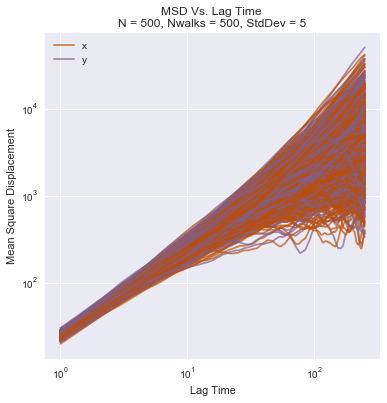

In [51]:
a = 5
N = 500
Nwalks = 500
msd_plots(a, N, Nwalks)